# Hotel Booking Cancellation

## Importing Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the file

In [48]:
df = pd.read_csv(r'G:\Imarticus Data\Data analytics\Python Data\hotel_bookings 2.csv')

In [49]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015


## Exploratory Data analysis and Cleaning

In [50]:
df.shape

(119390, 32)

In [51]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [53]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

In [54]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [55]:
for col in df.describe(include = 'object').columns :
    print(col)
    print(df[col].unique())
    print('-'*50)
    
    

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [56]:
df.isnull().sum()[df.isnull().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [57]:
df = df.drop(['company' , 'agent'] , axis = 1)

In [58]:
df = df.dropna()

In [59]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [60]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [61]:
df = df[df['adr'] < 5000]

In [62]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


## Data Analysis & Visualization

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


<BarContainer object of 2 artists>

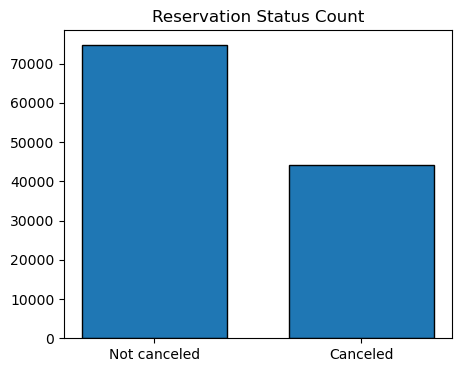

In [63]:
perc_canceled = df['is_canceled'].value_counts(normalize= True)
print(perc_canceled)

plt.figure(figsize= (5, 4))
plt.title('Reservation Status Count')
plt.bar(['Not canceled' , 'Canceled'] , df['is_canceled'].value_counts() , edgecolor = 'k' , width = 0.7)

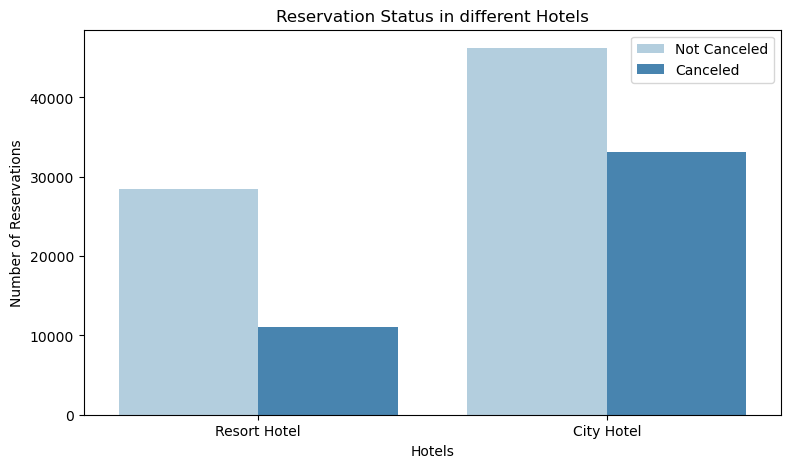

In [64]:
plt.figure(figsize= (9,5))
ax1 = sns.countplot(x = 'hotel' , hue = 'is_canceled' , data = df , palette= 'Blues')
plt.title('Reservation Status in different Hotels')
plt.xlabel('Hotels')
plt.ylabel('Number of Reservations')
plt.legend(['Not Canceled' , 'Canceled'])
plt.show()

In [65]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [66]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [67]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

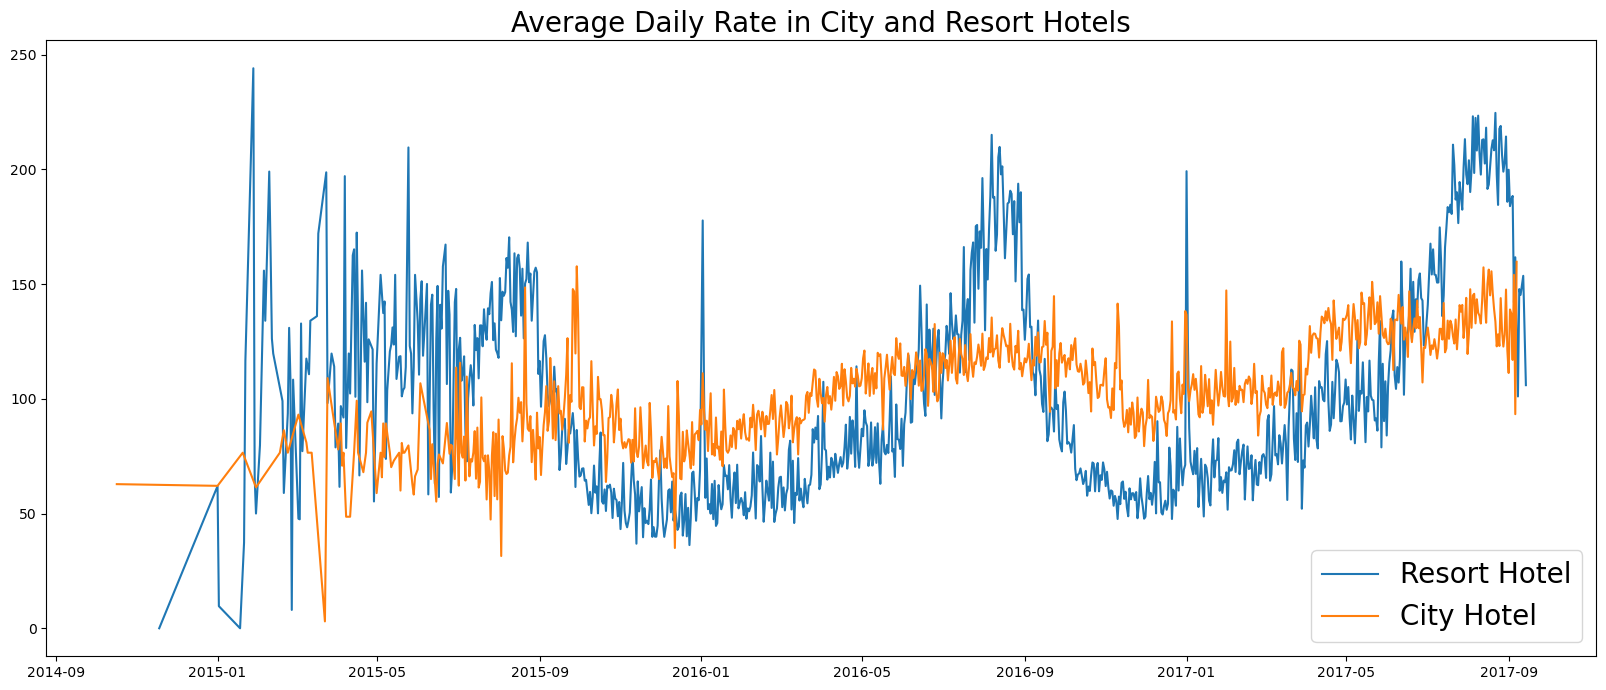

In [68]:
plt.figure(figsize= (20, 8))
plt.title('Average Daily Rate in City and Resort Hotels' , fontsize = 20)
plt.plot(resort_hotel.index , resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index , city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize= 20)
plt.show()

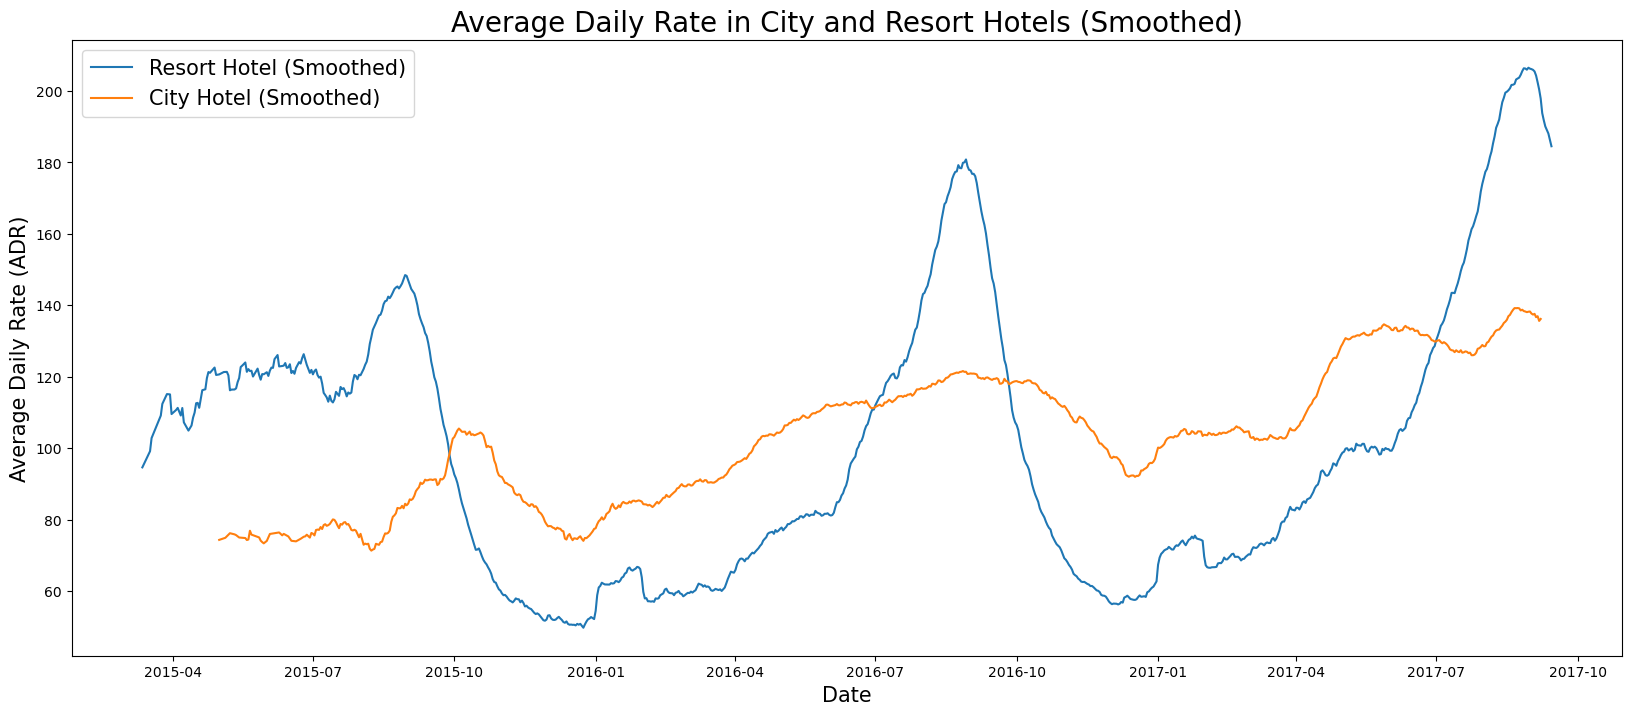

In [69]:
resort_hotel['adr_rolling'] = resort_hotel['adr'].rolling(window=30).mean()
city_hotel['adr_rolling'] = city_hotel['adr'].rolling(window=30).mean()

plt.figure(figsize=(20, 8))
plt.title('Average Daily Rate in City and Resort Hotels (Smoothed)', fontsize=20)
plt.plot(resort_hotel.index, resort_hotel['adr_rolling'], label='Resort Hotel (Smoothed)')
plt.plot(city_hotel.index, city_hotel['adr_rolling'], label='City Hotel (Smoothed)')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Daily Rate (ADR)', fontsize=15)
plt.legend(fontsize=15)
plt.show()


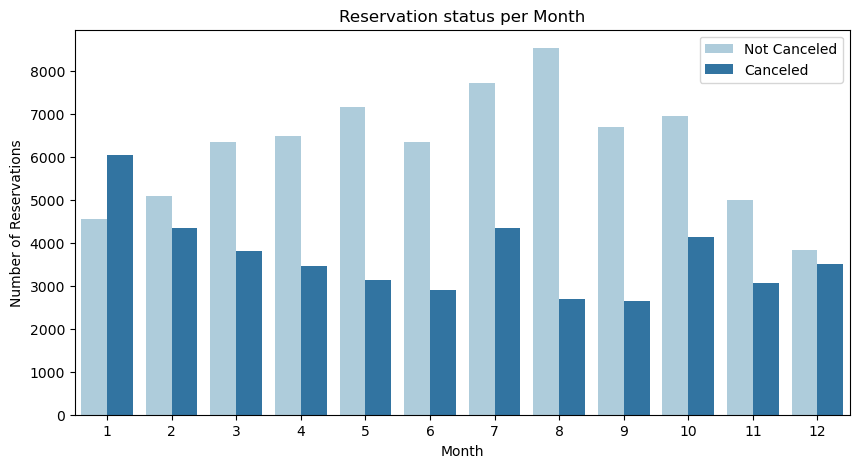

In [70]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize= (10, 5))
ax1 = sns.countplot(x = 'month', data = df,  hue = 'is_canceled', palette= 'Paired')
plt.title('Reservation status per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['Not Canceled' , 'Canceled'])
plt.show()

- Most number of cancelation is observed in January, followed by July and February
- Lowest cancelations are in August & September
- We can also observe the highest number of Reservations in August and lowest in December.

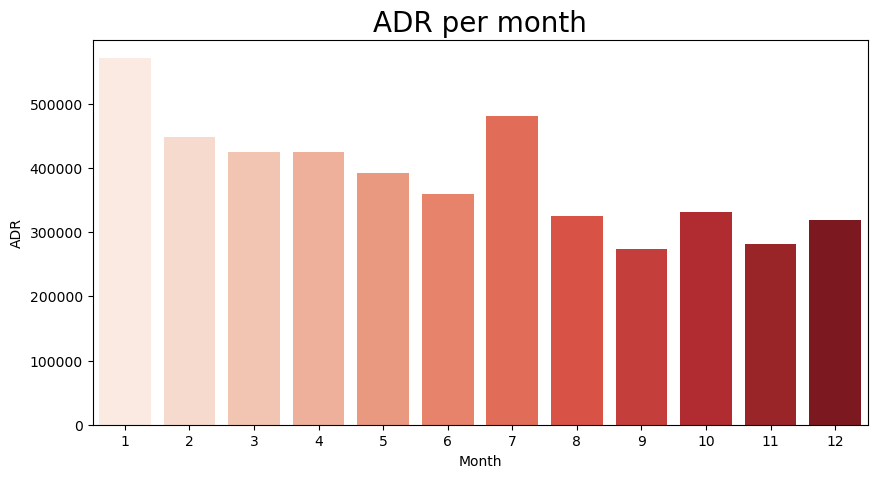

In [71]:
plt.figure(figsize= (10, 5))
sns.barplot(x ='month', y= 'adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index() , palette= 'Reds' )
plt.title('ADR per month', fontsize = 20)
plt.xlabel('Month')
plt.ylabel('ADR')
plt.show()

- Highest ADR is in the month of January followed by July and February
- Here lowest ADR can be seen in the month of August and September.

 So we can conclude that number of cancellations increase when average daily rates of Hotels increase.

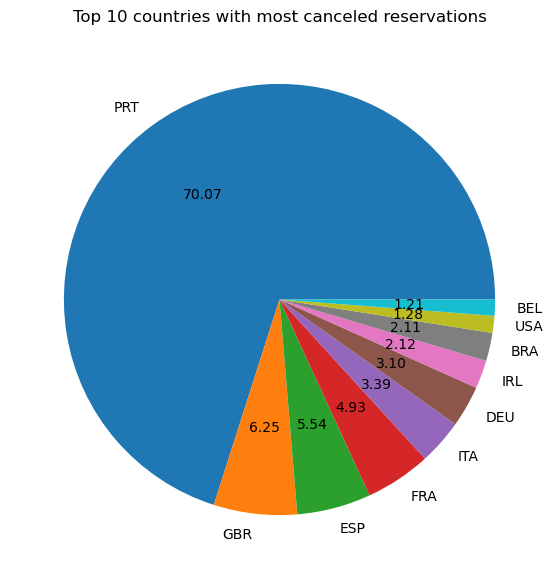

In [72]:
canceled_data = df[df['is_canceled'] == 1]
top_10_countries = canceled_data['country'].value_counts()[:10]
plt.figure(figsize= (7,7))
plt.pie(top_10_countries, autopct= "%.2f", labels= top_10_countries.index)
plt.title("Top 10 countries with most canceled reservations")
plt.show()

In [73]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

- 47% of the people are making reservations online

In [74]:
canceled_data['market_segment'].value_counts(normalize = True) * 100

market_segment
Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: proportion, dtype: float64

- Approximately 47% of people who canceled the reservations have made it online.  

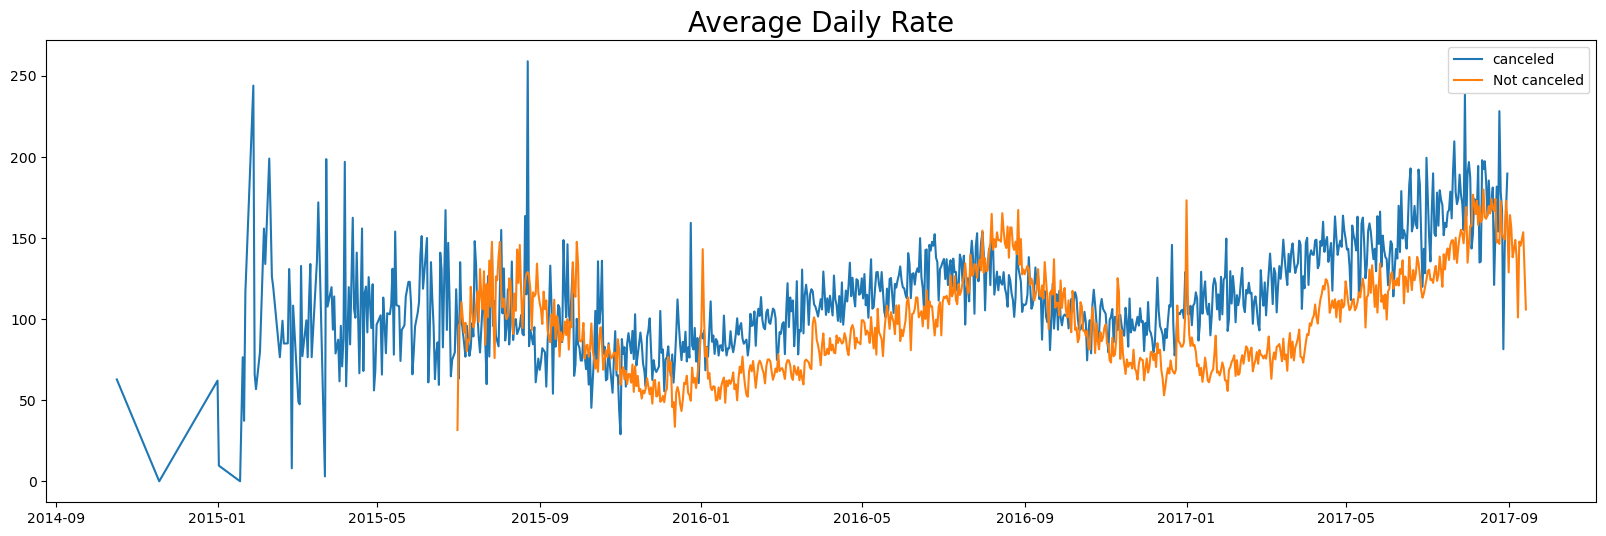

In [75]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace = True)
canceled_df_adr.sort_values('reservation_status_date', inplace = True)

not_canceled_data= df[df['is_canceled'] == 0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace = True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize= (20, 6))
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label = 'canceled')
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label = 'Not canceled')
plt.title('Average Daily Rate', fontsize= 20 )
plt.legend()
plt.show()

In [76]:
canceled_df_adr = canceled_df_adr[(canceled_df_adr['reservation_status_date'] > '2016') & 
                                     (canceled_df_adr['reservation_status_date'] < '2017-09')]

not_canceled_df_adr = not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date'] > '2016') & 
                                     (not_canceled_df_adr['reservation_status_date'] < '2017-09')]

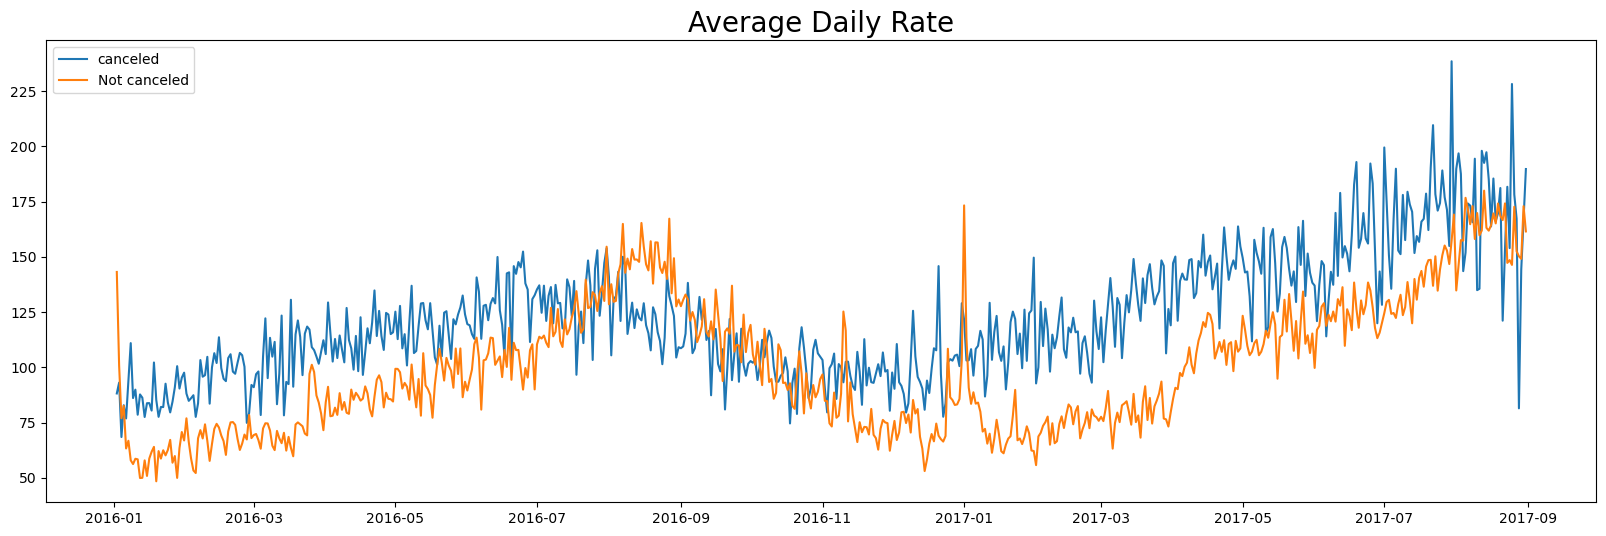

In [77]:
plt.figure(figsize= (20, 6))
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label = 'canceled')
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label = 'Not canceled')
plt.title('Average Daily Rate', fontsize = 20 )
plt.legend()
plt.show()

- Here we can see that hotels with high adr have more cancellations than low adr. 

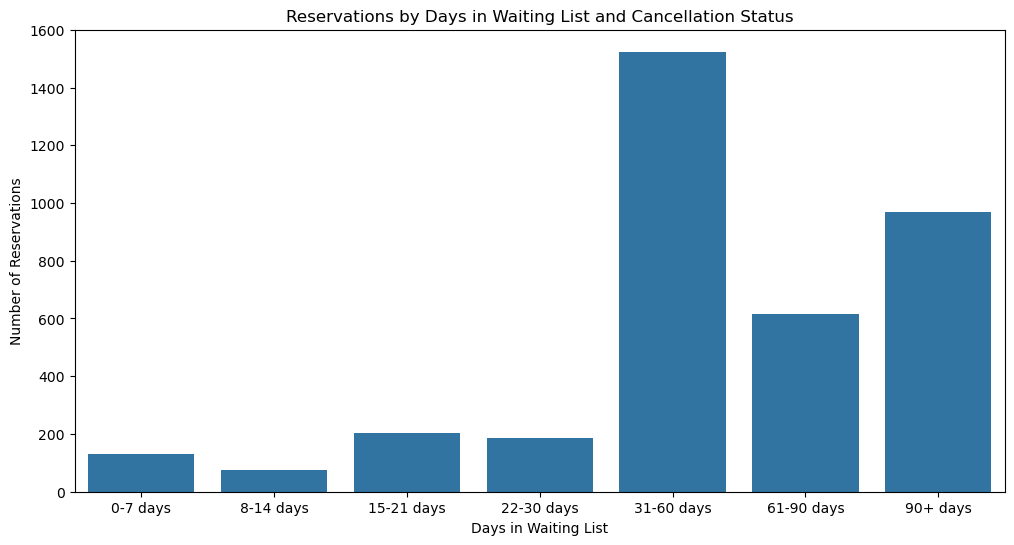

In [78]:
bins = [0, 7, 14, 21, 30, 60, 90, float('inf')]
labels = ['0-7 days', '8-14 days', '15-21 days', '22-30 days', '31-60 days', '61-90 days', '90+ days']
df['waiting_list_bins'] = pd.cut(df['days_in_waiting_list'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.countplot(x='waiting_list_bins', data=df)
plt.title('Reservations by Days in Waiting List and Cancellation Status')
plt.xlabel('Days in Waiting List')
plt.ylabel('Number of Reservations')
plt.show()

- Longer waiting periods (over 30 days) are associated with higher cancellation rates. 
- Shorter waiting periods (under 30 days) are associated with lower cancellation rates.